# **BLACK FRIDAY SALES- ANALYSIS AND PREDICTION**
* Black Friday is a colloquial term for the Friday following Thanksgiving Day in the United States. Many stores offer highly promoted sales on Black Friday and open very early, or some time on Thanksgiving Day. Black Friday has routinely been the busiest shopping day of the year in the United States since at least 2005

- For prediction, we will use following algorithms:

1. Linear Regression

2. Lasso Regression

3. Ridge Regression

4. Decision Tree Regressor

5. Random Forest Regressor

- By using the above algorithms, we will firstly explore the data that we have and check for any null or missing values. If found then we'll clean tha data and then visualize it for better understanding and draw insights.
- Then we'll proceed by data training i.e. spliting data into training and testing data.Then train our model by providing training data and once the model will be trained, we will perform prediction for the test data.
- At last, we will evaluate the performance of these algorithmns by error check and accuracy check.

- Steps followed are as:

  Step 1: Data Exploration

  Step 2: Data Cleaning

  Step 3: Data Visualization

  Step 4: Data Preparation & Training

  Step 5: Model Creation

  Step 6: Performance Evaluation

## **Data Exploration**

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('G:/ML-DL-NLP/Black Friday Sales- Analysis and Prediction/Dataset/train.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
data.shape

(550068, 12)

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Check for null values:

In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
data.isnull().sum().sum()

556885

There are total 136344 null values in the data set which we need to either replace or remove.

## **Data Cleaning**

In [11]:
data['Product_Category_2'].isnull().sum()

173638

In [12]:
data['Product_Category_2'].mean()

9.842329251122386

In [13]:
data['Product_Category_2'].fillna('9',inplace=True)

In [14]:
data['Product_Category_2'].isnull().sum()

0

In [15]:
data['Product_Category_3'].isnull().sum()

383247

In [16]:
data['Product_Category_3'].mean()

12.668243206790512

In [17]:
data['Product_Category_3'].fillna('12',inplace=True)

In [18]:
data['Product_Category_3'].isnull().sum()

0

In [19]:
data['Purchase'].isnull().sum()

0

In [20]:
data['Purchase'].mean()

9263.968712959126

In [21]:
data['Purchase'].fillna('9300',inplace=True)

In [22]:
data['Purchase'].isnull().sum()

0

In [23]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [24]:
data.isnull().sum().sum()

0

The data is now cleaned i.e. there are no missing or null values.

## **Data Visualization**

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Gender of the person ')

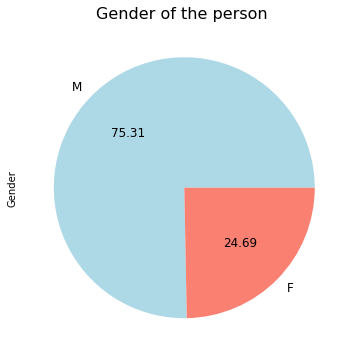

In [26]:
data['Gender'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','salmon'])
plt.title("Gender of the person ",fontsize=16)

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


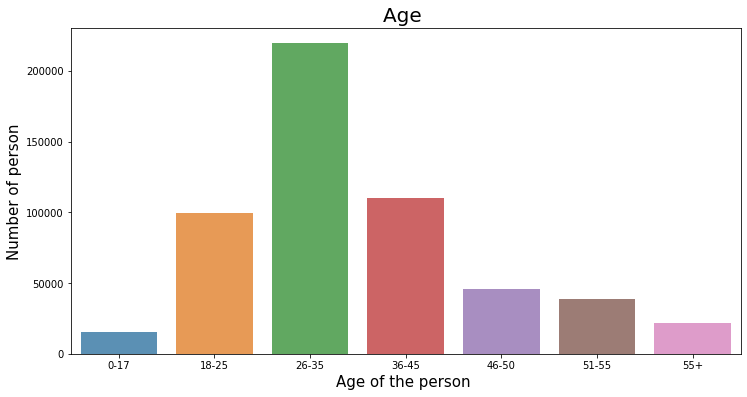

In [27]:
count=data['Age'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Age ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Age of the person ", fontsize=15)
plt.show()

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


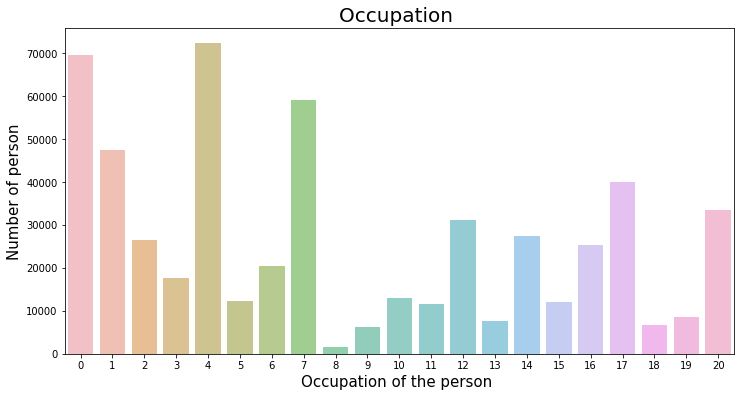

In [28]:
count=data['Occupation'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Occupation ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Occupation of the person ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'City of the person ')

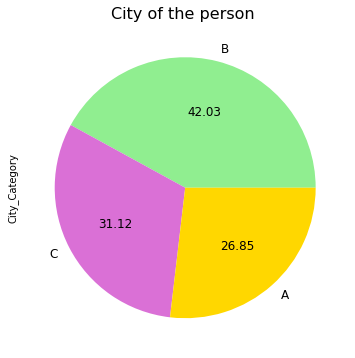

In [29]:
data['City_Category'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','orchid','gold'])
plt.title("City of the person ",fontsize=16)

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


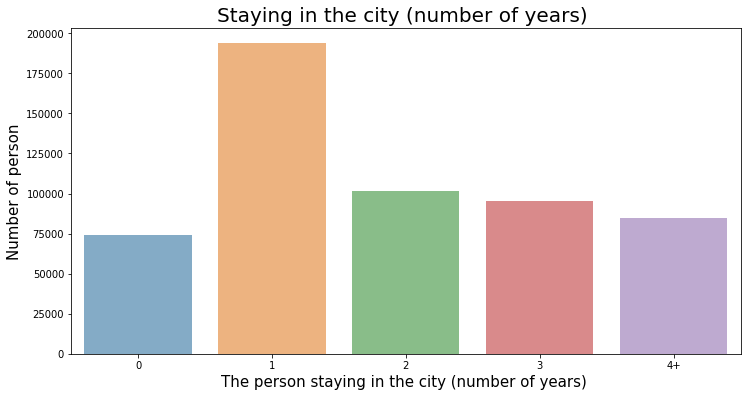

In [30]:
count=data['Stay_In_Current_City_Years'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Staying in the city (number of years) ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("The person staying in the city (number of years) ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Marital Status of the person ')

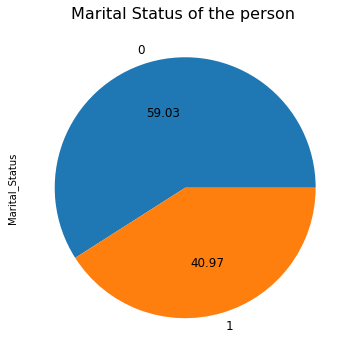

In [31]:
data['Marital_Status'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title("Marital Status of the person ",fontsize=16)

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


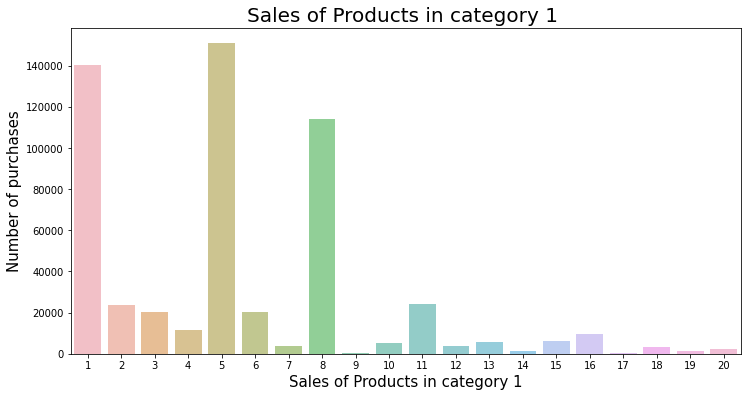

In [32]:
count=data['Product_Category_1'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Sales of Products in category 1 ", fontsize=20)
plt.ylabel('Number of purchases', fontsize=15)
plt.xlabel("Sales of Products in category 1", fontsize=15)
plt.show()

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


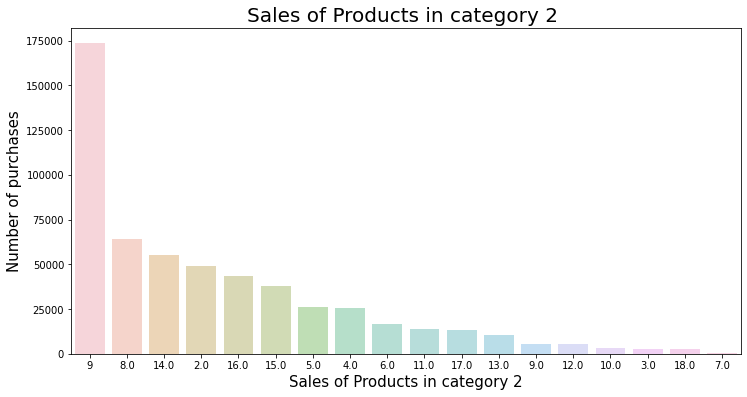

In [33]:
count=data['Product_Category_2'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.4)
plt.title("Sales of Products in category 2 ", fontsize=20)
plt.ylabel('Number of purchases', fontsize=15)
plt.xlabel("Sales of Products in category 2", fontsize=15)
plt.show()

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


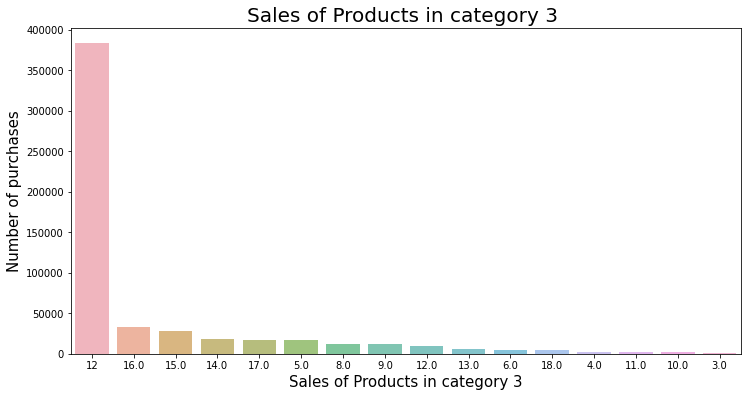

In [34]:
count=data['Product_Category_3'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.title("Sales of Products in category 3 ", fontsize=20)
plt.ylabel('Number of purchases', fontsize=15)
plt.xlabel("Sales of Products in category 3", fontsize=15)
plt.show()

### Insights drawn:
* **Males** showed more interest in the black friday sales than as compared to that of females.
*  **Age group 26-35** were more active than other age groups.
* People from **20 different occupations** showed their interest in the black friday sales.
* People from **city B** were more as compared to city A & C.
* Maximum people are staying in their respective city from **1 year**.
* **59.09% **people were unmarried  and 40.91 % were married among total participation.
* There are 18 subcategories of products in category 1.
* There are 17 subcategories of products in category 2.
* There are 15 subcategories of products in category 3.

## **Data Preparation & Training**

Data Preparation:

In [35]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 50.4+ MB


In [37]:
columns=['Age','Gender']
data1=data[columns]
dummies=pd.get_dummies(data1,columns=['Age','Gender'])
dummies

,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
550063,0,0,0,0,0,1,0,0,1
550064,0,0,1,0,0,0,0,1,0
550065,0,0,1,0,0,0,0,1,0
550066,0,0,0,0,0,0,1,1,0


In [38]:
mergeddata= pd.concat([data,dummies],axis='columns')
mergeddata

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,...,8370,1,0,0,0,0,0,0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,15200,1,0,0,0,0,0,0,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,...,1422,1,0,0,0,0,0,0,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1057,1,0,0,0,0,0,0,1,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,...,7969,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9,...,368,0,0,0,0,0,1,0,0,1
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9,...,371,0,0,1,0,0,0,0,1,0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9,...,137,0,0,1,0,0,0,0,1,0
550066,1006038,P00375436,F,55+,1,C,2,0,20,9,...,365,0,0,0,0,0,0,1,1,0


In [39]:
newdata=mergeddata.drop(['Age','Gender'],axis='columns')
newdata

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1000001,P00069042,10,A,2,0,3,9,12,8370,1,0,0,0,0,0,0,1,0
1,1000001,P00248942,10,A,2,0,1,6.0,14.0,15200,1,0,0,0,0,0,0,1,0
2,1000001,P00087842,10,A,2,0,12,9,12,1422,1,0,0,0,0,0,0,1,0
3,1000001,P00085442,10,A,2,0,12,14.0,12,1057,1,0,0,0,0,0,0,1,0
4,1000002,P00285442,16,C,4+,0,8,9,12,7969,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,B,1,1,20,9,12,368,0,0,0,0,0,1,0,0,1
550064,1006035,P00375436,1,C,3,0,20,9,12,371,0,0,1,0,0,0,0,1,0
550065,1006036,P00375436,15,B,4+,1,20,9,12,137,0,0,1,0,0,0,0,1,0
550066,1006038,P00375436,1,C,2,0,20,9,12,365,0,0,0,0,0,0,1,1,0


In [40]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  object
 8   Product_Category_3          550068 non-null  object
 9   Purchase                    550068 non-null  int64 
 10  Age_0-17                    550068 non-null  uint8 
 11  Age_18-25                   550068 non-null  uint8 
 12  Age_26-35                   550068 non-null  uint8 
 13  Age_36-45                   5

In [41]:
newdata1=newdata.drop(['User_ID', 'Product_ID','City_Category','Stay_In_Current_City_Years'],axis=1)
newdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Occupation          550068 non-null  int64 
 1   Marital_Status      550068 non-null  int64 
 2   Product_Category_1  550068 non-null  int64 
 3   Product_Category_2  550068 non-null  object
 4   Product_Category_3  550068 non-null  object
 5   Purchase            550068 non-null  int64 
 6   Age_0-17            550068 non-null  uint8 
 7   Age_18-25           550068 non-null  uint8 
 8   Age_26-35           550068 non-null  uint8 
 9   Age_36-45           550068 non-null  uint8 
 10  Age_46-50           550068 non-null  uint8 
 11  Age_51-55           550068 non-null  uint8 
 12  Age_55+             550068 non-null  uint8 
 13  Gender_F            550068 non-null  uint8 
 14  Gender_M            550068 non-null  uint8 
dtypes: int64(4), object(2), uint8(9)
memory usage: 29.9

In [42]:
#converting data into int datatype to avoid errors below.
prepareddata=newdata1.astype(int)
prepareddata.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,10,0,3,9,12,8370,1,0,0,0,0,0,0,1,0
1,10,0,1,6,14,15200,1,0,0,0,0,0,0,1,0
2,10,0,12,9,12,1422,1,0,0,0,0,0,0,1,0
3,10,0,12,14,12,1057,1,0,0,0,0,0,0,1,0
4,16,0,8,9,12,7969,0,0,0,0,0,0,1,0,1


In [43]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Occupation          550068 non-null  int32
 1   Marital_Status      550068 non-null  int32
 2   Product_Category_1  550068 non-null  int32
 3   Product_Category_2  550068 non-null  int32
 4   Product_Category_3  550068 non-null  int32
 5   Purchase            550068 non-null  int32
 6   Age_0-17            550068 non-null  int32
 7   Age_18-25           550068 non-null  int32
 8   Age_26-35           550068 non-null  int32
 9   Age_36-45           550068 non-null  int32
 10  Age_46-50           550068 non-null  int32
 11  Age_51-55           550068 non-null  int32
 12  Age_55+             550068 non-null  int32
 13  Gender_F            550068 non-null  int32
 14  Gender_M            550068 non-null  int32
dtypes: int32(15)
memory usage: 31.5 MB


In [44]:
prepareddata.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Gender_F', 'Gender_M'],
      dtype='object')

<AxesSubplot:>

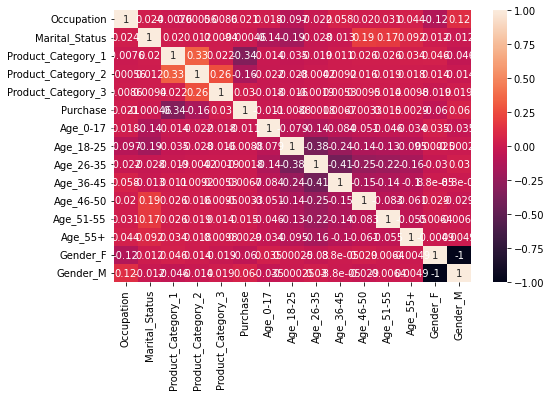

In [45]:
plt.figure(figsize = (8,5))
corr = prepareddata.corr() 
sns.heatmap(corr, annot=True)

Data Training:

In [46]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have feature and y will have our target.
x=prepareddata[['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3','Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Gender_F', 'Gender_M']]  
y=prepareddata['Purchase']

In [47]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=500) 
#Ratio used for splitting training and testing data is 8:2 respectively

## **Model Creation**

Linear Regression

In [48]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [49]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [50]:
# Making predictions 
pred1 = reg1.predict(x_test)

In [51]:
pred1

array([ 9643.5   ,  8940.125 , 11078.375 , ...,  9472.125 , 10758.4375,
       11361.25  ])

In [52]:
print("Accuracy of the Linear Regression model is: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the Linear Regression model is: 
 
0.12689679000273035


Lasso Regression

In [53]:
# Importing model
from sklearn.linear_model import Lasso
reg2 = Lasso()

In [54]:
# Fitting data into the model.
reg2.fit(x_train, y_train)

Lasso()

In [55]:
# Making predictions 
pred2 = reg2.predict(x_test)

In [56]:
pred2

array([ 9642.29146937,  8936.27277091, 11063.48236943, ...,
        9471.48560077, 10739.9316517 , 11398.9852169 ])

In [57]:
print("Accuracy of the Lasso Regression model is: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the Lasso Regression model is: 
 
0.12689303709221167


Ridge Regression

In [58]:
# Importing model
from sklearn.linear_model import Ridge
reg3 = Ridge()

In [59]:
# Fitting data into the model.
reg3.fit(x_train, y_train)

Ridge()

In [60]:
# Making predictions 
pred3 = reg3.predict(x_test)

In [61]:
pred3

array([ 9649.18939943,  8929.73790208, 11086.34668552, ...,
        9469.52520165, 10758.89783139, 11365.65434999])

In [62]:
print("Accuracy of the Ridge Regression model is: \n ") 
print(reg3.score(x_train,y_train))

Accuracy of the Ridge Regression model is: 
 
0.12689817347941068


Decision Tree Regressor

In [63]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg4 = DecisionTreeRegressor()

In [64]:
#Fitting data into the model.
reg4.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
# Making predictions on Test data 
pred4 = reg4.predict(x_test)

In [66]:
pred4

array([ 6037.72607261,  6513.43478261,  9903.        , ...,
        6992.28571429, 14603.5       , 14161.83333333])

In [67]:
print("Accuracy of the Decision Tree Regressor  model is: \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model is: 
 
0.7083489196954293


Random Forest Regression

In [68]:
#Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
reg5 = RandomForestRegressor(n_estimators=100)

In [69]:
# Fitting data into the model.
reg5.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
#making predictions.
pred5 = reg5.predict(x_test)

In [71]:
pred5

array([ 6032.5993526 ,  6509.08174793, 10544.90641962, ...,
        6944.09941875, 14799.38780278, 14075.80151633])

In [72]:
print("Accuracy of the Random Forest Regressor  model is: \n ") 
print(reg5.score(x_train,y_train))

Accuracy of the Random Forest Regressor  model is: 
 
0.7057472408480849


## **Performance Evaluation**

In [73]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t    Accuracy of the model") 
print("""Linear Regression       \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Lasso Regression        \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))
print("""Ridge Regression        \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train,y_train)))
print("""Decision Tree Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(x_train,y_train)))
print("""Random Forest Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred5)), reg5.score(x_train,y_train)))

Model			          RootMeanSquareError  		    Accuracy of the model
Linear Regression       		 4703.5092 	 		 0.1269
Lasso Regression        		 4703.5994 	 		 0.1269
Ridge Regression        		 4703.4937 	 		 0.1269
Decision Tree Regressor 		 3082.2723 	 		 0.7083
Random Forest Regressor 		 3014.9748 	 		 0.7057


### Conclusion:
Performance of Decision tree regressor is better in terms of accuracy as compared to linear regression, lasso regression, ridge regression and random forest regressor.